In [18]:
import pandas as pd
from fbprophet import Prophet
from pathlib import Path

In [19]:
df = pd.read_csv(Path('..\Data\\btt-usd-max.csv'))[['snapped_at', 'price']]
df.head()

,snapped_at,price
0,2019-02-01 00:00:00 UTC,0.000495
1,2019-02-02 00:00:00 UTC,0.000473
2,2019-02-03 00:00:00 UTC,0.000433
3,2019-02-04 00:00:00 UTC,0.000601
4,2019-02-05 00:00:00 UTC,0.000863


In [20]:
df.rename(columns={'snapped_at': 'ds', 'price': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
# df = df.loc[df['ds'].dt.year >= 2021]
df.head()

,ds,y
0,2019-02-01,0.000495
1,2019-02-02,0.000473
2,2019-02-03,0.000433
3,2019-02-04,0.000601
4,2019-02-05,0.000863


In [21]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2019-02-01,-0.000140,-0.001441,0.001171
1,2019-02-02,-0.000101,-0.001355,0.001064
2,2019-02-03,-0.000073,-0.001322,0.001161
3,2019-02-04,-0.000028,-0.001319,0.001203
4,2019-02-05,0.000004,-0.001160,0.001196


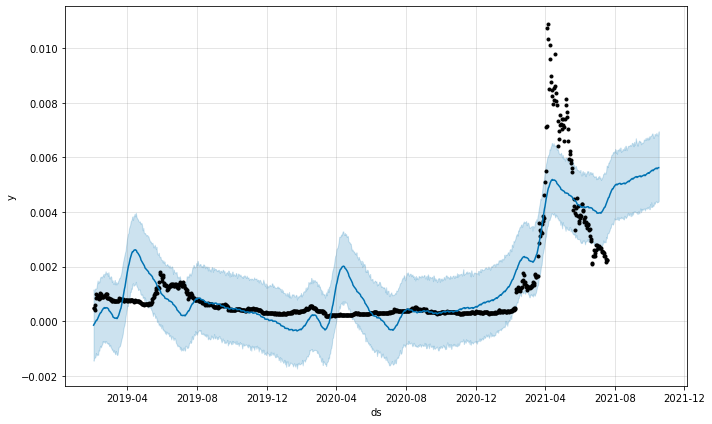

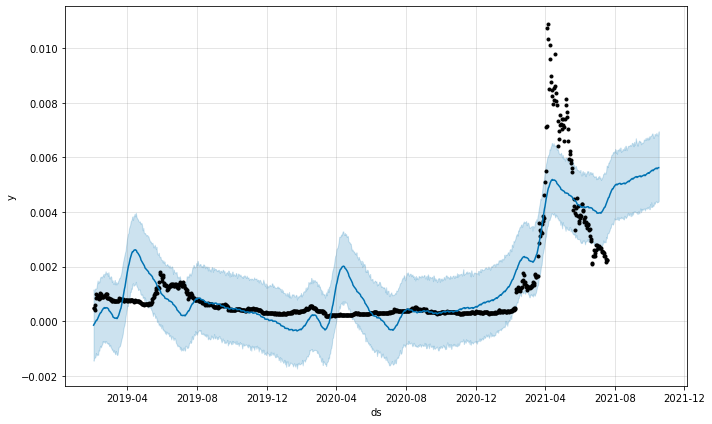

In [22]:
m.plot(forecast)

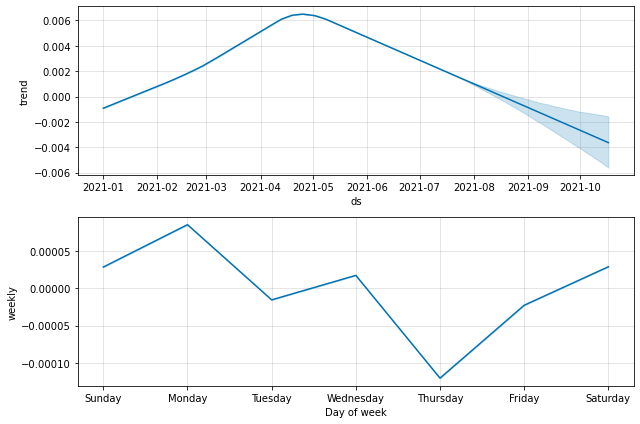

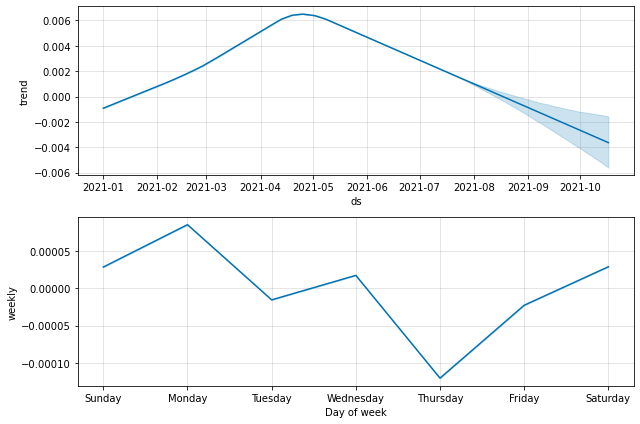

In [17]:
m.plot_components(forecast)